In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
data = pd.read_csv("diabetes2.csv")
data.head().transpose()    

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


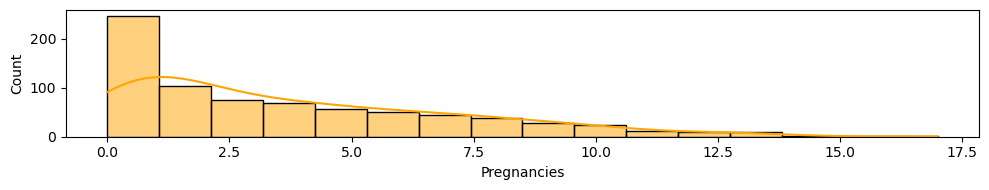

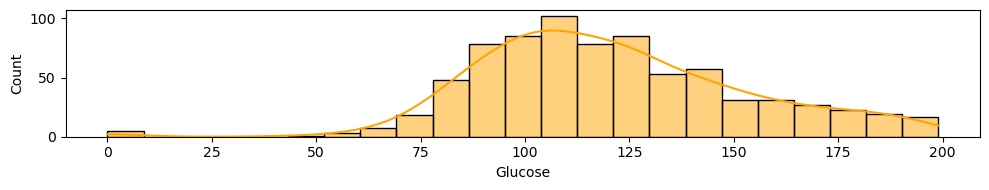

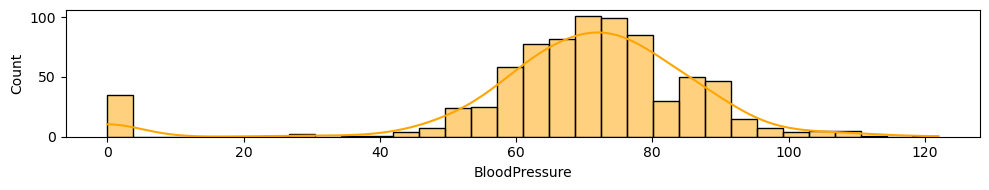

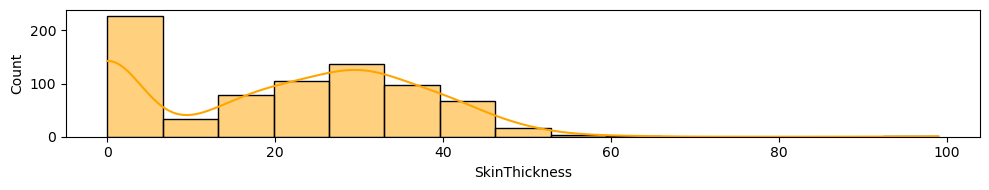

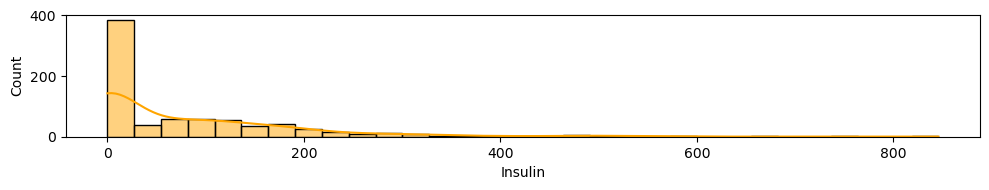

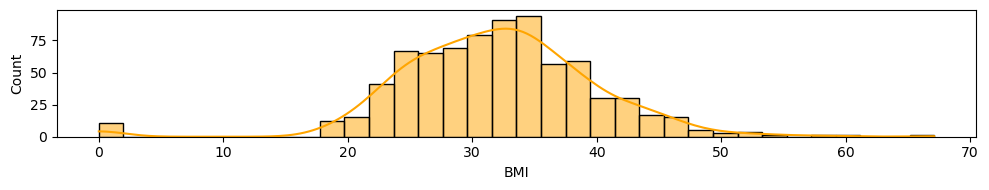

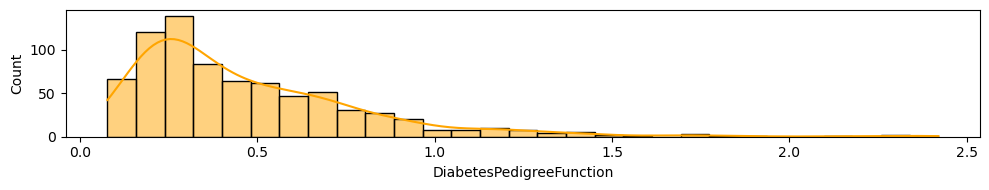

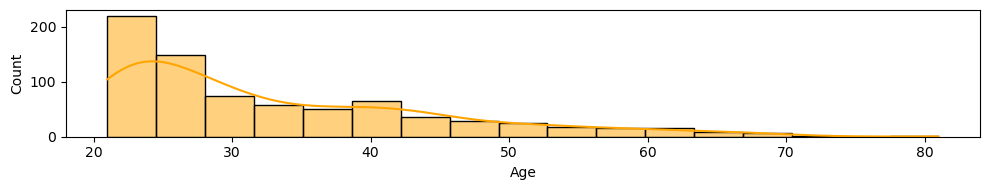

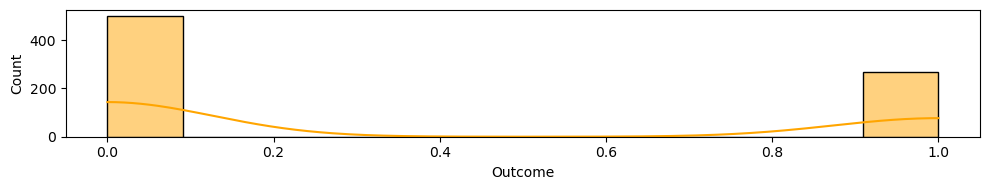

In [56]:
for i in data.columns:
    fig, ax = plt.subplots(figsize=(10, 2))  # Use plt.subplots instead
    sns.histplot(data=data, x=i, kde=True, color='orange')
    # You can add something to ax[1] or leave it blank
    plt.tight_layout()
    plt.show()

In [3]:
data.shape

(768, 9)

In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isna().sum()    

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
!pip install seaborn --upgrade

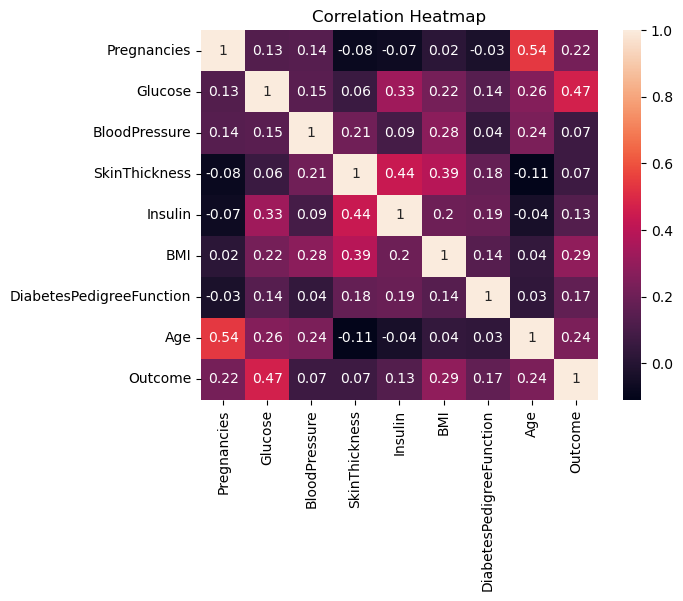

In [8]:
heatmap1 = data.corr().round(2)
sns.heatmap(heatmap1, annot =True)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
cols_to_fix = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction' , 'Age']
# Replace 0s with np.nan only in specific columns
data[cols_to_fix] = data[cols_to_fix].replace(0, np.nan)

# Optional: check before dropping/filling
print(data['Outcome'].value_counts())

# Fill missing values with column median
data.fillna(data.median(), inplace=True)

# Now check class balance again
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    500
1    268
Name: count, dtype: int64


In [10]:
scaler = StandardScaler()
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction' , 'Age']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [11]:
X = data.drop('Outcome', axis=1)    #feature column
y= data['Outcome']   #target variable
Scaler = StandardScaler()
X_scaled = scaler.fit_transform

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 242)

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")
precision = precision_score(y_test, y_pred)
print(f"Model Precision: {precision*100:.2f}%")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall*100:.2f}%")
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1*100:.2f}%")


Model Accuracy: 81.82%
Model Precision: 74.29%
Recall: 57.78%
F1 score: 65.00%


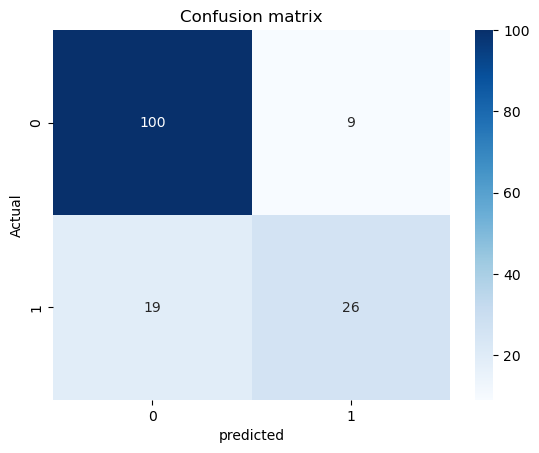

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()



In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       109
           1       0.74      0.58      0.65        45

    accuracy                           0.82       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.82      0.81       154



In [43]:
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data=[0,170,126,60,35,30.1,0.649,78]
paitentid_54=pd.DataFrame([data],columns=x)
paitentid_54.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,170,126,60,35,30.1,0.649,78


In [46]:
predictions_diabetes=model.predict(paitentid_54)
print(predictions_diabetes)

[1]


In [17]:
sample_input = [[2, 197, 70, 99, 0, 34.7, 0.575, 62]]

# Column names (ensure they match the ones used during training)
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create DataFrame for input
input_df = pd.DataFrame(sample_input, columns=columns)

# Apply the same scaling as you did during training
scaled_input = scaler.transform(input_df)

# Make the prediction
prediction = model.predict(scaled_input)
print(prediction)

[1]


C:\Users\MANASWITA GHOSE\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [18]:
import warnings
warnings.filterwarnings('ignore')

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
def get_user_input():
    a1 = float(input("Enter Pregnancies: "))
    a2 = float(input("Enter Glucose: "))
    a3 = float(input("Enter BloodPressure: "))
    a4 = float(input("Enter SkinThickness: "))
    a5 = float(input("Enter Insulin: "))
    a6 = float(input("Enter BMI: "))
    a7 = float(input("Enter DiabetesPedigreeFunction: "))
    a8 = float(input("Enter Age: "))

    return [a1, a2, a3, a4, a5, a6, a7, a8]

user_input = get_user_input()

# Reshape input for prediction
user_input_df = pd.DataFrame([user_input], columns=columns)
                               # Make it 2D for the model

# Apply any preprocessing (e.g., scaling) before prediction
scaled_input = scaler.transform(user_input_df)  # Assuming you have a scaler fitted

# Predict using the model
prediction = model.predict(scaled_input)

# Print the result
if prediction == 1:
    print("Diabetic Patient")
else:
    print("Not a Diabetic Patient")
     

Enter Pregnancies:  7
Enter Glucose:  127
Enter BloodPressure:  70
Enter SkinThickness:  99
Enter Insulin:  0
Enter BMI:  27
Enter DiabetesPedigreeFunction:  0.567
Enter Age:  45


Not a Diabetic Patient


In [54]:
a1 = float(input("Enter Pregnancies: "))
a2 = float(input("Enter Glucose: "))
a3 = float(input("Enter BloodPressure: "))
a4 = float(input("Enter SkinThickness: "))
a5 = float(input("Enter Insulin: "))
a6 = float(input("Enter BMI: "))
a7 = float(input("Enter DiabetesPedigreeFunction: "))
a8 = float(input("Enter Age: "))

# Put input into a DataFrame with correct column names
input_data = pd.DataFrame([[a1, a2, a3, a4, a5, a6, a7, a8]],
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Scale the input
input_scaled = scaler.transform(input_data)

# Predict
prediction = model.predict(input_scaled)[0]

# Show result
if prediction == 1:
    print(" Diabetic Patient")
else:
    print(" Not a Diabetic Patient")

Enter Pregnancies:  2
Enter Glucose:  197
Enter BloodPressure:  70
Enter SkinThickness:  99
Enter Insulin:  0
Enter BMI:  27
Enter DiabetesPedigreeFunction:  0.567
Enter Age:  45


🔴 Diabetic Patient


C:\Users\MANASWITA GHOSE\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[:10]

array([[0.17667506, 0.82332494],
       [0.25330606, 0.74669394],
       [0.94608426, 0.05391574],
       [0.11059275, 0.88940725],
       [0.40036599, 0.59963401],
       [0.91195324, 0.08804676],
       [0.87909959, 0.12090041],
       [0.60194919, 0.39805081],
       [0.70165789, 0.29834211],
       [0.6589026 , 0.3410974 ]])

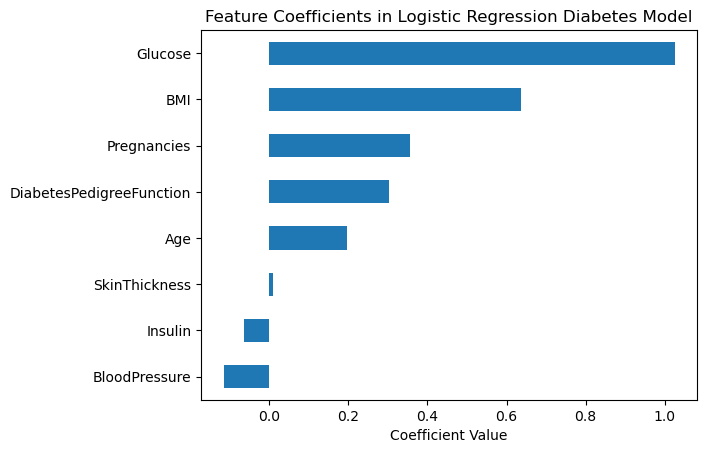

In [21]:
coefficients = pd.Series(model.coef_[0], index=data.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Diabetes Model")
plt.xlabel("Coefficient Value")
plt.show()

In [22]:
log_loss(y_test, y_pred)   #The lower the log loss value, the better the model is considered to be.

6.553391525294027

In [28]:
#Bias
class Logistic_Regression():
    def __init__(self, alpha=0.01, num_iters=1000):
        self.num_iters = num_iters
        self.alpha = alpha
        self.w = None
        self.b = None

#sigmoid function
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

#Cost function
    def LogLoss(self, y, y_pred):
        return -(y*np.log(y_pred)) - ((1-y) * np.log(1-y_pred))
    def cost_func(self, y, y_pred):
        m = len(y)
        cost = np.sum(self.LogLoss(y, y_pred)) / m
        return cost

#Gradient descent
    def gradientdescent (self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        for i in range(self.num_iters):
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)

            dw = (1/m) * np.dot(X.T, (y_pred-y))
            db = (1/m) * np.sum(y_pred - y)
            self.w -= self.alpha*dw   #update weights and bias
            self.b -= self.alpha*db
        
# accuracy
   

    def accuracy(self, y, y_pred):
         correct_predictions = np.sum(y == y_pred)
         accuracy = correct_predictions / len(y)
         return accuracy  
        
        
    

In [33]:
model = Logistic_Regression()
model.gradientdescent(X, y)

# Calculate accuracy
acc = model.accuracy(y_test, y_pred)

# Print resultsprint("Weights:", model.w)
print("Bias:", model.b)
print("Predictions:", y_pred)
print("Accuracy:", acc)

Bias: -0.6491922721778102
Predictions: [1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0]
Accuracy: 0.8181818181818182


In [30]:
print(y_test.shape, y_pred.shape)

(154,) (154,)


In [34]:
def predict(self, X):
        z = np.dot(X, self.w) + self.b
        yhat = self.sigmoid(z)
        pred_class = [1if p >= 0.50 else 0 for p in yhat]
        return np.array(pred_class)